# Leaning outcomes
1. Gentle intro on CV
2. Recap on images as Numpy aray
3. Image cropping
4. Splitting and merging of color channels
5. Points operations
    - elementary operations: addition, subtractions, multiplication and division
    - gamma corection (non linear technique)
6. Image blending (add 2 images together)

In [1]:
import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import show_img

## Recap on images asNumpy array
There are 2 primary types of images : **grayscale** and **color** 

| grayscale | color |
| :-: | :-: |
|matrix (2D array) | 3D array |
| (h,w) | (h,w,channels) |

In [2]:
# create a grayscale image
img = np.zeros((2,4),dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
img[0,1] = 50
img[1,2] = 150

print(img)

[[  0  50   0   0]
 [  0   0 150   0]]


In [5]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[  0   0   0]
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [150 150 150]
  [  0   0   0]]]


# Access elements in array

In [6]:
img = cv.imread("images/lena.jfif")

a = img[49,219,2]
b = img.item(49,219,2)
a == b 

True

# Numpy slicing

In [7]:
h,w = img.shape[:2]
yc, xc = h//2,w//2

topleft = img[:yc, :xc]

show_img("topleft", topleft)

In [8]:
# 60 x 60 central region of the image
centre = img[yc-30:yc+30,xc-30:xc+30]

show_img("centre", centre)

# Create a white image

In [9]:
img = np.zeros((200,200)) + 255
img = np.uint8(img)

show_img("img", img)

### Exercise

In [10]:
## Extract region of interest
img = cv.imread("images/flower.jfif")

show_img("img",img)

### There are three way to get the indices needed

In [11]:
[i for i in dir(cv) if i.startswith("Event")]

[]

In [12]:
# 1 way
def rect_region(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img,(x,y), 1, (0,0,255), -1)
        cv.show("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
img_copy = img.copy()
flower = img_copy[41:120, 89:173]

show_img("flower", flower)

In [14]:
# 2nd way: (easier)
bbox = cv.selectROI("crop", img_copy)

flower = img_copy[int(bbox[1]): int(bbox[1] + bbox[3]), 
                  int(bbox[0] + bbox[2])]

show_img('flower',flower)

In [15]:
# 3rd way: paint app

In [16]:
img_arr = np.zeros((30,30), dtype = np.uint8)

img_arr[:10, 10:20] = 255
img_arr[10:20, :10] = 255
img_arr[10:20, 20:] = 255
img_arr[20:, 10:20] = 255

img = np.tile(img_arr, (3, 3))

show_img("pattern", img)

## Image cropping 
Why?
- Remove unwanted object
- Seperate the image into into a $3 \times 3$ grids. We move / adjust the camera in such a way that the object of interest lies on the gridlines or their intersections. As such, your image would look more aethetically appealing. This is know as rule of thirds.
- One of the image augmentation methods for Deep learning (DL) model training.

In [17]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
#user defined parameters
n_vertical_grids = 4 
n_horizontal_grids = 4 

M = int(h / n_vertical_grids)
N = int(h / n_horizontal_grids)

tiles = []

for y in range(0, h, M):
    for x in range(0, w , N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1 
            y1 = h - 1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w - 1 
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop", img_copy)

In [18]:
show_img("patch", tiles[9])

# Splitting and merging color channels

In [19]:
img = cv.imread("images/lena.jfif")

(b, g, r) = cv.split(img)
img_merge = cv.merge((b, g, r))
np.array_equal(img,img_merge)

True

In [20]:
import matplotlib.pyplot as plt

Display the blue, green and red channel of the lena image simultaneously. Comment on the images displayed.

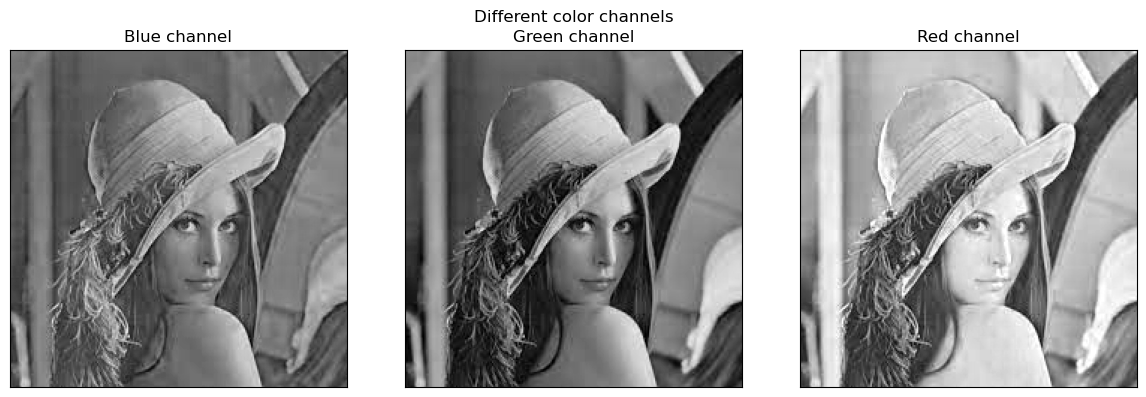

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey = True)
fig.suptitle("Different color channels")

ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="Blue channel", xticks=[], yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="Green channel", xticks=[], yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="Red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

Display the following images which originates from the file "images/dog.jfif".

In [22]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)
# this color variable will be window names
colors = ("blue", "green", "red")

imgs = []

for i, ch in  enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[..., i] = ch
    imgs.append(img_arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
Elementary math operations: addition, subtraction, multiplication and division.

$$f_{trans}(\textbf{x}) = \alpha f(x) + \beta$$

In [23]:
np.uint8(np.array([-2,0,255,300]))

array([254,   0, 255,  44], dtype=uint8)

In [24]:
def point_op(img, alpha, beta):
    """point operators of image. Arguments:
    1. source image
    2. multiplier
    3. constant"""
    img = img.astype(float) #multiple normally not using uint8
    res = alpha * img + beta
    res = np.clip(res,0 ,255) #limit the output only within 0 - 255
    return np.uint8(res)

In [25]:
img = cv.imread("images/bridge.jfif")

# increase the brightness and contrast
transform = point_op(img, 1.6, 20)
 
cv.imshow("original", img)
show_img("transform",transform)

In [26]:
darken = point_op(img, 1, -80)

show_img("img",darken)

## gamma correction
Technique to adjust brightness of image.

$$O = (\frac{I}{255})^{\gamma} \times 255$$

In [29]:
gamma = 1 / 2.2

lookUpTable = np.empty((1, 256), dtype=np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
img_ori = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img_ori, lookUpTable)

cv.namedWindow("ori", cv.WINDOW_NORMAL)
# cv.namedWindow("results", cv.WINDOW_NORMAL)
cv.imshow("ori", img_ori)
show_img("results", res, adjust=True)

## Image blending (add 2 images)
```
cv.addWeighted(img1, alpha, img2, 1-alpha, beta)
```

$$h(x) = \alpha f(x) + (1 - \alpha) g(x) + \beta$$

In [130]:
img =cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img2 to be the same dimension as img
h,w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alpha = 0.7

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("lena", img)
cv.imshow("resized coin", img2)
show_img("img blending", res)

## Weekly Exercise

1. Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [131]:
width = 450
height = 300

# Generate random noise image (color)
color_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# Convert color image to grayscale
grayscale_image = cv.cvtColor(color_image, cv.COLOR_BGR2GRAY)

# Display the color and grayscale images
cv.imshow("Color Image", color_image)
cv.imshow("Grayscale Image", grayscale_image)
cv.waitKey(0)
cv.destroyAllWindows()

2. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
- img is the source image
- num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
- line_color is the color of the grid line.
- The output of the function should be image with grids


In [57]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    height, width = img.shape[:2]

    patch_width = width // num_horizontal_grid
    patch_height = height // num_vertical_grid

    # Draw vertical lines
    for x in range(0, width, patch_width):
        cv.line(img, (x, 0), (x, height), line_color, 1)

    # Draw horizontal lines
    for y in range(0, height, patch_height):
        cv.line(img, (0, y), (width, y), line_color, 1)

    return img

img = cv.imread("images/lena.jfif")

num_horizontal_grid = 5
num_vertical_grid = 4
line_color = (125, 0, 255)  # Colour

grid_img = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

# Display the image with grids
cv.imshow('Image with Grids', grid_img)
cv.waitKey(0)
cv.destroyAllWindows()

3. Display image sequences of smooth transition of two images with different values of $\alpha$. Refer to code in section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.

In [105]:
# Load the base images
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alpha = 0.7

start_time = 0.0
end_time = 1.0
step = 0.05

# Add the alpha with the alpha step one by one with th step value and loop all the blend img
for alpha in np.arange(start_time, end_time + step, step):
    res = cv.addWeighted(img, alpha, img2, 1 - alpha, 0)

    # Display
    cv.imshow("img blending", res)
    cv.waitKey(100) #set delay of screen
    
cv.waitKey(0)
cv.destroyAllWindows()


4. Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg". The example of resulting watermarked image are as shown in the following: activity_image

In [132]:
img =cv.imread("images/travel_hd.jpg")
img2 = cv.imread("images/watermark.png")

img = cv.resize(img, (400, 600))

# resize img2 to be the same dimension as img
h,w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alpha = 0.65 # let the image clearer or blur 

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("travel_hd", img)
cv.imshow("resized watermark", img2)
show_img("img blending", res)

cv.waitKey(0)
cv.destroyAllWindows()